# Entrenamiento de Redes Neuronales con Scikit Learn

## Multi-layer perceptron: Ejemplo 1

En éste primer ejemplo se ilustra el entrenamiento de una Red Neuronal Artificial tipo perceptron multicapa (MLP) usando Scikit Learn. Para el ejemplo sólo se considera: como se importa el modelo MLP, como se dividien los datos en un conjunto training y un conjunto test, así como la sintaxis usada para el llamado del modelo especificando algunos hiper - parámetros de forma básica.

Primero se importan librerias para el proyecto, así como "make blobs" para generar un conjunto de datos sintéticos con una distribución Gausiana

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

Se genera un conjunto de 200 instancias divididas en 4 grupos, ubicadas cada una de ellas alrededor de los centroides definidos en blob_centers. La función make_blobs regresa el conjunto de datos generados así como sus respectivas etiquetas ([Referencia](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)).
Posteriormente se genera una gráfica con plt.subplots() ([Referencia](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)). Para ello, se recorre cada clase y se van filtrando las instancias pertenecientes a cada clase, se obtiene la coordenada (x, y) de cada instancia, se le asigna un color (c), el tamaño (s), y la etiqueta de clase de cada punto.

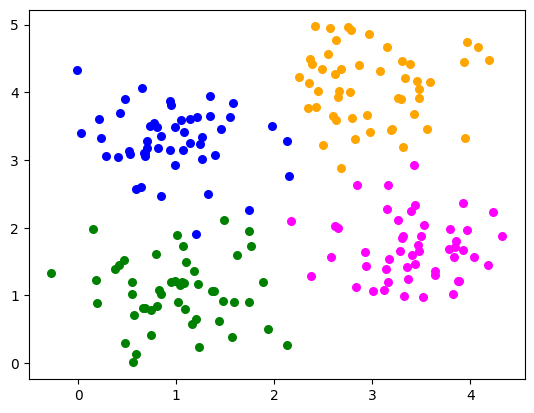

In [3]:
n_samples = 200
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
data, labels = make_blobs(n_samples=n_samples, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)


colours = ('green', 'orange', "blue", "magenta")
fig, ax = plt.subplots()

for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=30, 
               label=str(n_class))

Se importa la función para generar el conjunto de entrenamiento y prueba: 80% training, 20% test

In [4]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

Se importa una red neuronal tipo percetrón multicapa de propagación hacia adelante (Multi-Layer Percetron) y se configuran sus parámetros ([Referencia](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)). 

In [5]:
from sklearn.neural_network import MLPClassifier

modelo = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(6), 
                    random_state=1)

modelo.fit(train_data, train_labels)     

MLPClassifier(alpha=1e-05, hidden_layer_sizes=6, random_state=1, solver='lbfgs')

In [54]:
modelo.score(train_data, train_labels)

1.0

In [55]:
from sklearn.metrics import accuracy_score

predictions_train = modelo.predict(train_data)
predictions_test = modelo.predict(test_data)
acc_train_score = accuracy_score(predictions_train, train_labels)
print("Accuracy score on train data: ", acc_train_score)
acc_test_score = accuracy_score(predictions_test, test_labels)
print("Accuracy score on test data: ", acc_test_score)

Accuracy score on train data:  1.0
Accuracy score on test data:  0.95


(-0.5065230266180804,
 4.554095584804821,
 -0.23850867545879395,
 5.219921034171477)

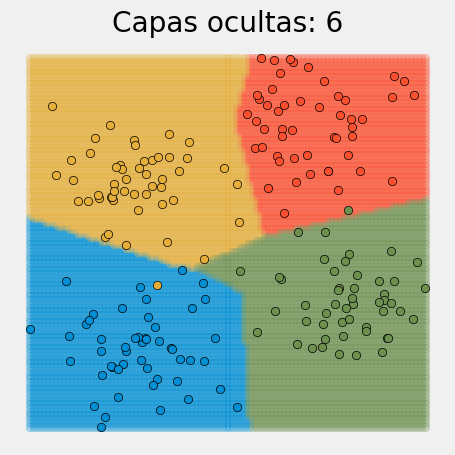

In [63]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

grid_x1 = np.linspace(start=min(data[:, 0]), stop=max(data[:, 0]), num=100)
grid_x2 = np.linspace(start=min(data[:, 1]), stop=max(data[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

predicciones = modelo.predict(X_grid)

for j in np.unique(predicciones):
    ax.scatter(
        x = X_grid[predicciones == j, 0],
        y = X_grid[predicciones == j, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
        alpha = 0.3,
    )
for j in np.unique(labels):
    ax.scatter(
        x = data[labels == j, 0],
        y = data[labels == j, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
        marker    = 'o',
        edgecolor = 'black'
    )

ax.set_title(f"Capas ocultas: {modelo.hidden_layer_sizes}")
ax.axis('off')
    
